In [1]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ipywidgets as widgets
import matplotlib.pyplot as plt

pio.templates.default = "seaborn"
pd.options.plotting.backend = "plotly"
pio.templates["seaborn"].layout.colorway = px.colors.qualitative.D3

%matplotlib inline
%run global.ipynb

In [2]:
%store -r day_df
df = day_df

In [3]:
df

,id,gender,ageRange,occupation,compareDate,stepsEstimate,series,hour,steps,work_age,period
0,5ee39a5f5e886e000876182a,None,None,None,2020-03-16,NaN,2019-12-16,10,74.400000,False,Before
1,5ee39a5f5e886e000876182a,None,None,None,2020-03-16,NaN,2019-12-16,11,113.466667,False,Before
2,5ee39a5f5e886e000876182a,None,None,None,2020-03-16,NaN,2019-12-16,12,267.066667,False,Before
3,5ee39a5f5e886e000876182a,None,None,None,2020-03-16,NaN,2019-12-16,13,178.866667,False,Before
4,5ee39a5f5e886e000876182a,None,None,None,2020-03-16,NaN,2019-12-16,14,323.000000,False,Before
...,...,...,...,...,...,...,...,...,...,...,...
694051,61af75effdde7a000853faad,Female,35-44,tjänsteman kommun,2020-03-16,-0.2,2021-02-16,05,10.445672,True,During
694052,61af75effdde7a000853faad,Female,35-44,tjänsteman kommun,2020-03-16,-0.2,2021-02-16,06,364.363903,True,During
694053,61af75effdde7a000853faad,Female,35-44,tjänsteman kommun,2020-03-16,-0.2,2021-02-16,07,979.696745,True,During
694054,61af75effdde7a000853faad,Female,35-44,tjänsteman kommun,2020-03-16,-0.2,2021-02-16,08,424.530925,True,During


In [4]:
daily_steps = df.groupby(['id', 'series', 'period'])['steps'].sum().reset_index()

In [5]:
avg_daily_steps = daily_steps.groupby(['id', 'period'])['steps'].mean().reset_index()

In [6]:
avg_daily_steps

,id,period,steps
0,5ee363476c1e91000780579a,Before,4037.849277
1,5ee363476c1e91000780579a,During,4659.290323
2,5ee39a5f5e886e000876182a,Before,3132.974713
3,5ee39a5f5e886e000876182a,During,1574.715540
4,5ee39a6c25435e00071454e5,Before,5323.540675
...,...,...,...
3289,61ec70a206e45600092d7d07,During,5025.650531
3290,61efb71c51565f0009029cd9,Before,5857.692241
3291,61efb71c51565f0009029cd9,During,7187.932714
3292,61efb79a0e3de70009254596,Before,6297.441400


In [7]:
result_df = avg_daily_steps.pivot(index='id', columns='period', values='steps').reset_index()

In [8]:
result_df

period,id,Before,During
0,5ee363476c1e91000780579a,4037.849277,4659.290323
1,5ee39a5f5e886e000876182a,3132.974713,1574.715540
2,5ee39a6c25435e00071454e5,5323.540675,7906.370789
3,5ee7889a48553d0007a3611b,9581.592325,8910.635138
4,5ee86f904553a80008cc0d89,4037.849277,4627.301075
...,...,...,...
1642,61e6b433e7c8b70009c3afc4,3228.777139,3536.485315
1643,61e842c795259e0009bc6b34,7275.536145,5510.665397
1644,61ec70a206e45600092d7d07,6579.083958,5025.650531
1645,61efb71c51565f0009029cd9,5857.692241,7187.932714


In [9]:
result_df.columns = ['id', 'Average Daily Steps Before', 'Average Daily Steps After']


In [10]:
result_df['Percentage Change'] = ((result_df['Average Daily Steps After'] - result_df['Average Daily Steps Before']) / result_df['Average Daily Steps Before']) * 100

In [11]:
result_df

,id,Average Daily Steps Before,Average Daily Steps After,Percentage Change
0,5ee363476c1e91000780579a,4037.849277,4659.290323,15.390397
1,5ee39a5f5e886e000876182a,3132.974713,1574.715540,-49.737368
2,5ee39a6c25435e00071454e5,5323.540675,7906.370789,48.517148
3,5ee7889a48553d0007a3611b,9581.592325,8910.635138,-7.002565
4,5ee86f904553a80008cc0d89,4037.849277,4627.301075,14.598162
...,...,...,...,...
1642,61e6b433e7c8b70009c3afc4,3228.777139,3536.485315,9.530177
1643,61e842c795259e0009bc6b34,7275.536145,5510.665397,-24.257604
1644,61ec70a206e45600092d7d07,6579.083958,5025.650531,-23.611698
1645,61efb71c51565f0009029cd9,5857.692241,7187.932714,22.709293


In [12]:
gender_age_estimate_df = df[['id', 'gender', 'ageRange', 'stepsEstimate']].drop_duplicates()

In [13]:
final_df = pd.merge(result_df, gender_age_estimate_df, on='id', how='left')

In [14]:
final_df

,id,Average Daily Steps Before,Average Daily Steps After,Percentage Change,gender,ageRange,stepsEstimate
0,5ee363476c1e91000780579a,4037.849277,4659.290323,15.390397,None,None,NaN
1,5ee39a5f5e886e000876182a,3132.974713,1574.715540,-49.737368,None,None,NaN
2,5ee39a6c25435e00071454e5,5323.540675,7906.370789,48.517148,None,None,NaN
3,5ee7889a48553d0007a3611b,9581.592325,8910.635138,-7.002565,None,None,NaN
4,5ee86f904553a80008cc0d89,4037.849277,4627.301075,14.598162,None,None,NaN
...,...,...,...,...,...,...,...
1642,61e6b433e7c8b70009c3afc4,3228.777139,3536.485315,9.530177,Female,18-24,-0.3
1643,61e842c795259e0009bc6b34,7275.536145,5510.665397,-24.257604,Female,None,0.3
1644,61ec70a206e45600092d7d07,6579.083958,5025.650531,-23.611698,Female,45-54,0.0
1645,61efb71c51565f0009029cd9,5857.692241,7187.932714,22.709293,Female,18-24,-0.2


In [15]:
filtered_df = final_df.dropna(subset=['stepsEstimate'])
filtered_df = final_df.dropna(subset=['gender'])

In [16]:
# filtered_df = filtered_df[filtered_df['stepsEstimate'] == 0]

In [17]:
filtered_df

age_range_count = filtered_df.groupby('ageRange').size().reset_index(name='Count')

age_range_count

,ageRange,Count
0,18-24,141
1,25-34,239
2,35-44,293
3,45-54,369
4,55-64,264
5,65-74,109
6,75-84,26
7,85-94,2


In [18]:
# Group by ageRange and calculate the average estimate
age_range_avg = filtered_df.groupby('ageRange')['stepsEstimate'].mean().reset_index()

# Calculate the overall average estimate across all ageRanges
overall_avg = filtered_df['stepsEstimate'].mean()

# Add the overall average to the age_range_avg DataFrame
age_range_avg = age_range_avg.append({'ageRange': 'All', 'stepsEstimate': overall_avg}, ignore_index=True)

# Sort the DataFrame by ageRange so that 'All' comes last
age_range_avg = age_range_avg.sort_values(by='ageRange', key=lambda x: x.map(lambda y: 'ZZZ' if y == 'All' else y))

# Display the table
age_range_avg

/tmp/ipykernel_75/1827521160.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_range_avg = age_range_avg.append({'ageRange': 'All', 'stepsEstimate': overall_avg}, ignore_index=True)


,ageRange,stepsEstimate
0,18-24,-0.225000
1,25-34,-0.148954
2,35-44,-0.152389
3,45-54,-0.121274
4,55-64,-0.123674
5,65-74,-0.017431
6,75-84,0.028846
7,85-94,0.000000
8,All,-0.130855


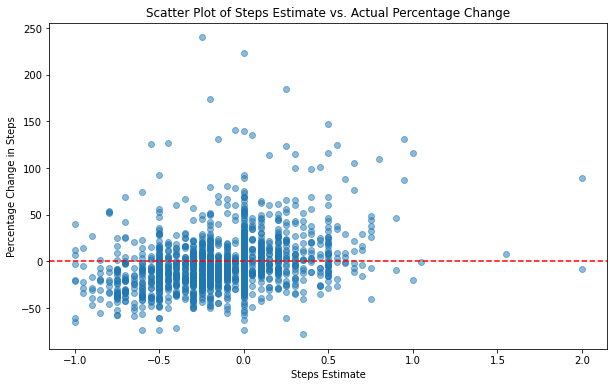

In [19]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['stepsEstimate'], filtered_df['Percentage Change'], alpha=0.5)

# Adding labels and title
plt.xlabel('Steps Estimate')
plt.ylabel('Percentage Change in Steps')
plt.title('Scatter Plot of Steps Estimate vs. Actual Percentage Change')

# Optionally, you can add a reference line at 0% change if that helps visualization
plt.axhline(0, color='red', linestyle='--')

plt.show()

In [20]:
# Assign quadrants based on the sign
filtered_df = filtered_df.copy()

# Assign quadrants with a new category for those who estimated 0
filtered_df['Quadrant'] = np.where(
    filtered_df['stepsEstimate'] == 0, 'Estimated zero',  # Exclude those who estimated 0
    np.where(
        (filtered_df['stepsEstimate'] > 0) & (filtered_df['Percentage Change'] >= 0), 'Moved more estimated more',
        np.where(
            (filtered_df['stepsEstimate'] < 0) & (filtered_df['Percentage Change'] >= 0), 'Moved more estimated less',
            np.where(
                (filtered_df['stepsEstimate'] < 0) & (filtered_df['Percentage Change'] < 0), 'Moved less estimated less',
                np.where(
                    (filtered_df['stepsEstimate'] > 0) & (filtered_df['Percentage Change'] < 0), 'Moved less estimated more',
                    'Estimated zero'  # This will handle any other cases, like NaNs
                )
            )
        )
    )
)

# Calculate percentage of users in each quadrant
quadrant_counts = filtered_df['Quadrant'].value_counts(normalize=True) * 100

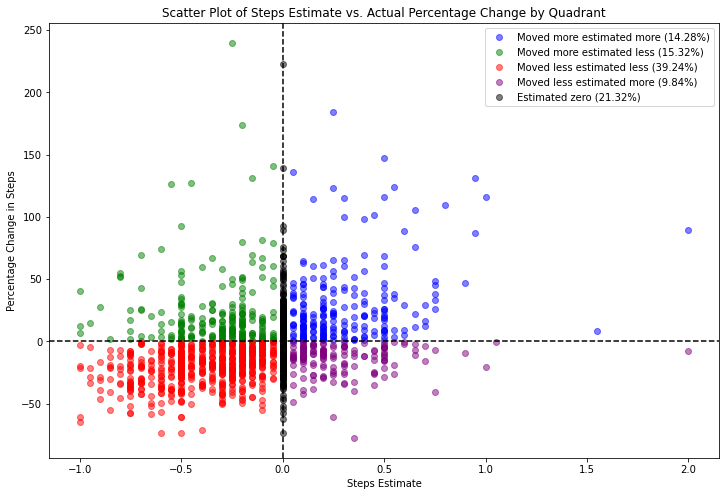

In [21]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
colors = {'Moved more estimated more': 'blue', 'Moved more estimated less': 'green', 'Moved less estimated less': 'red', 'Moved less estimated more': 'purple', 'Estimated zero': 'black'}
for quadrant, color in colors.items():
    subset = filtered_df[filtered_df['Quadrant'] == quadrant]
    plt.scatter(subset['stepsEstimate'], subset['Percentage Change'], c=color, label=f"{quadrant} ({quadrant_counts[quadrant]:.2f}%)", alpha=0.5)

# Adding labels, legend, and title
plt.xlabel('Steps Estimate')
plt.ylabel('Percentage Change in Steps')
plt.title('Scatter Plot of Steps Estimate vs. Actual Percentage Change by Quadrant')
plt.axvline(0, color='black', linestyle='--')  # Zero line for stepsEstimate
plt.axhline(0, color='black', linestyle='--')  # Zero line for Percentage Change
plt.legend()

plt.show()

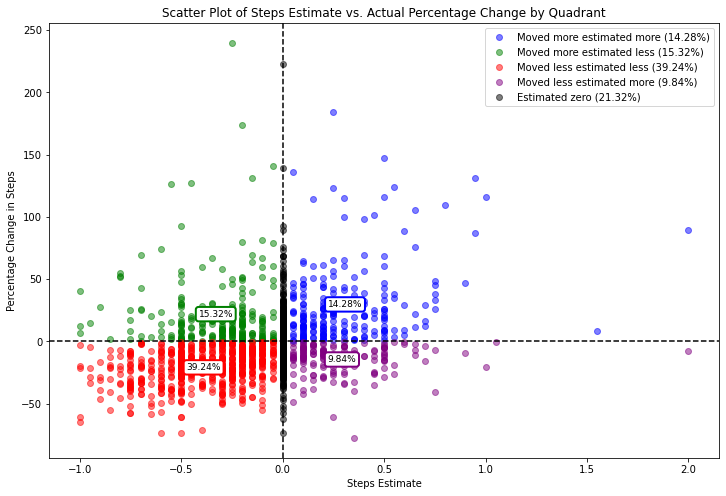

In [22]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
colors = {
    'Moved more estimated more': 'blue',
    'Moved more estimated less': 'green',
    'Moved less estimated less': 'red',
    'Moved less estimated more': 'purple',
    'Estimated zero': 'black'
}

# Find the centers for annotations
quadrant_centers = {
    quadrant: (np.mean(subset['stepsEstimate']), np.mean(subset['Percentage Change']))
    for quadrant, subset in filtered_df.groupby('Quadrant')
}

for quadrant, color in colors.items():
    subset = filtered_df[filtered_df['Quadrant'] == quadrant]
    plt.scatter(subset['stepsEstimate'], subset['Percentage Change'], c=color, label=f"{quadrant} ({quadrant_counts[quadrant]:.2f}%)", alpha=0.5)
    
    # Annotate the quadrant percentage in the center position
    if quadrant in quadrant_counts and quadrant in quadrant_centers and quadrant != 'Estimated zero':
        plt.annotate(
            f"{quadrant_counts[quadrant]:.2f}%", 
            xy=quadrant_centers[quadrant], 
            ha='center', 
            va='center',
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=2)
        )

# Adding labels, legend, and title
plt.xlabel('Steps Estimate')
plt.ylabel('Percentage Change in Steps')
plt.title('Scatter Plot of Steps Estimate vs. Actual Percentage Change by Quadrant')
plt.axvline(0, color='black', linestyle='--')  # Zero line for stepsEstimate
plt.axhline(0, color='black', linestyle='--')  # Zero line for Percentage Change
plt.legend()

plt.show()

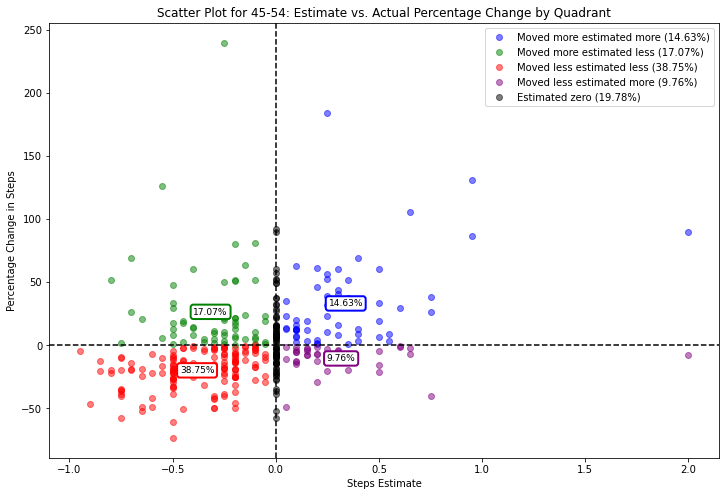

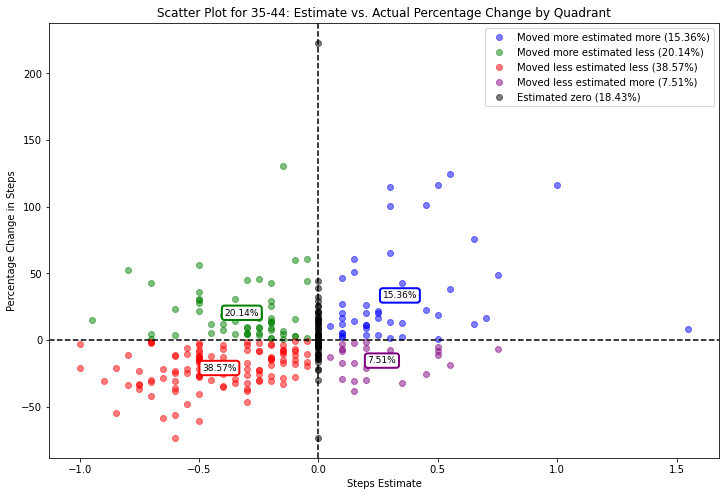

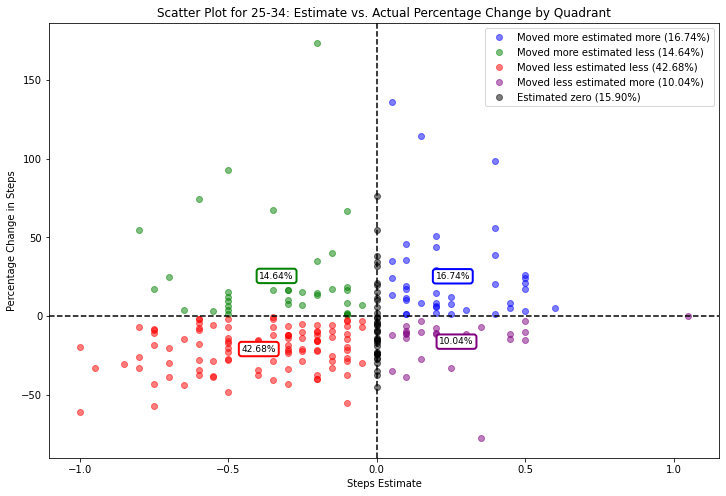

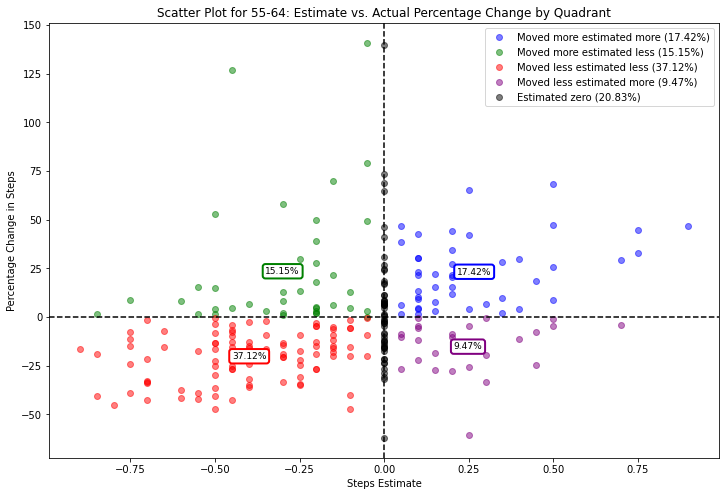

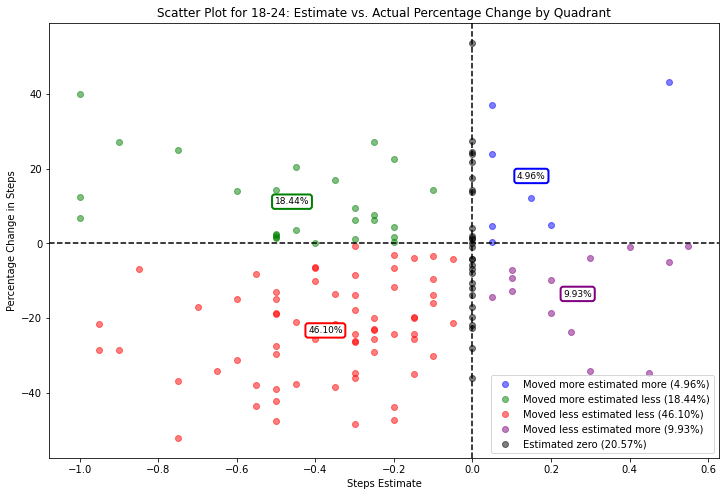

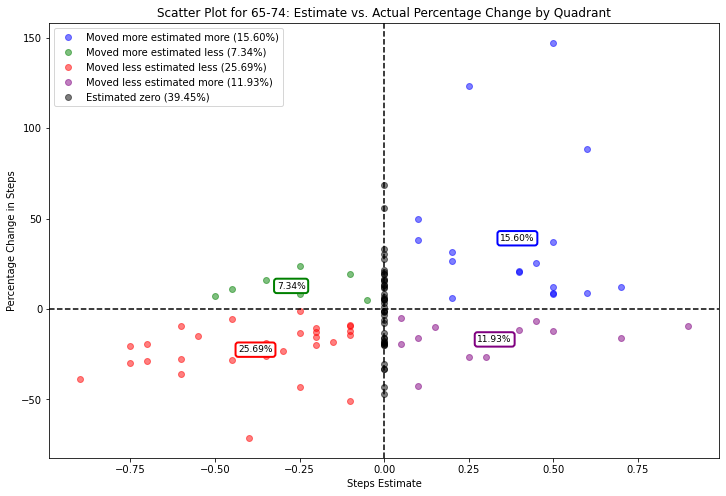

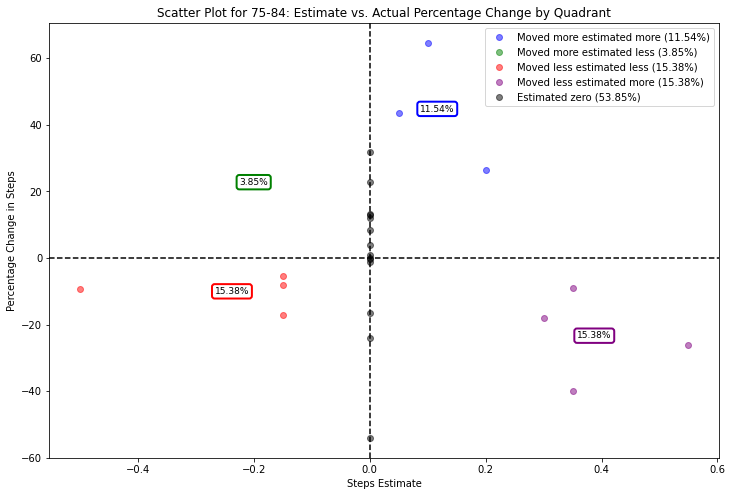

KeyError: 'Moved more estimated more'

<Figure size 864x576 with 0 Axes>

In [23]:
# Get unique age groups
age_groups = filtered_df['ageRange'].unique()

# Loop over each age group
for age_group in age_groups:
    # Filter the DataFrame for the current age group
    subset_df = filtered_df[filtered_df['ageRange'] == age_group]

    # Recalculate quadrant percentages for the current subset
    quadrant_counts = subset_df['Quadrant'].value_counts(normalize=True) * 100
    quadrant_centers = {
        quadrant: (np.mean(group['stepsEstimate']), np.mean(group['Percentage Change']))
        for quadrant, group in subset_df.groupby('Quadrant')
    }

    # Create the scatter plot for the current age group
    plt.figure(figsize=(12, 8))
    colors = {
        'Moved more estimated more': 'blue',
        'Moved more estimated less': 'green',
        'Moved less estimated less': 'red',
        'Moved less estimated more': 'purple',
        'Estimated zero': 'black'
    }

    for quadrant, color in colors.items():
        age_group_subset = subset_df[subset_df['Quadrant'] == quadrant]
        plt.scatter(age_group_subset['stepsEstimate'], age_group_subset['Percentage Change'], c=color, label=f"{quadrant} ({quadrant_counts[quadrant]:.2f}%)", alpha=0.5)
        
        # Annotate quadrant percentage if available
        if quadrant in quadrant_counts and quadrant in quadrant_centers and quadrant != 'Estimated zero':
            plt.annotate(
                f"{quadrant_counts.get(quadrant, 0):.2f}%", 
                xy=quadrant_centers[quadrant], 
                ha='center', 
                va='center',
                fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=2)
            )

    # Adding labels, legend, and title
    plt.xlabel('Steps Estimate')
    plt.ylabel('Percentage Change in Steps')
    plt.title(f'Scatter Plot for {age_group}: Estimate vs. Actual Percentage Change by Quadrant')
    plt.axvline(0, color='black', linestyle='--')  # Zero line for stepsEstimate
    plt.axhline(0, color='black', linestyle='--')  # Zero line for Percentage Change
    plt.legend()

    # Display plot inline or save to file
    plt.show()
    # plt.savefig(f'Quadrant_Plot_{age_group}.png')  # Optionally save the plot to a file
    plt.close()

In [24]:
category_avg_difference = filtered_df.groupby('category')['Difference'].mean().reset_index()

# Sort the categories by difference to have a meaningful order on the x-axis
category_avg_difference = category_avg_difference.sort_values('Difference', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(category_avg_difference['category'], category_avg_difference['Difference'], color='lightblue')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Average Absolute Difference')
plt.title('Average Difference by Category')

plt.xticks(rotation=45)  # Rotate the x-axis labels to show them better
plt.show()

KeyError: 'category'

In [ ]:
# Assuming 'ageRange' is the column with age group information in filtered_df
# Calculate the absolute difference between the estimate and actual percentage change
filtered_df['Absolute Difference'] = abs(filtered_df['stepsEstimate'] - filtered_df['Percentage Change'])

# Group by age range and calculate the mean of the absolute difference
age_group_difference = filtered_df.groupby('ageRange')['Absolute Difference'].mean().reset_index()

# Sort the DataFrame by age groups for a meaningful order in the chart (optional)
age_group_difference = age_group_difference.sort_values('ageRange')

# Create the bar chart
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.bar(age_group_difference['ageRange'], age_group_difference['Absolute Difference'], color='teal')

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('Average Distance Between Estimate and Outcome')
plt.title('Average Distance by Age Group')

plt.xticks(rotation=45)  # Rotate the x-axis labels if needed for better visibility
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()